# Imports

In [38]:
import pandas
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.patheffects as path_effects
import numpy as np

# Load data

In [39]:
df_performance = pandas.read_csv('performance.csv', sep=";")
df_performance

,Model,Q3,SE Q3
0,SeqVec embeddings,73.2,0.6
1,SeqVec MSA embeddings,78.3,0.6
2,SeqVec MSA consensus,76.5,0.4
3,SeqVec PSSM (model 0),NaN,NaN
4,SeqVec PSSM (model 1),NaN,NaN
5,Bert embeddings,NaN,NaN
6,Bert MSA embeddings,NaN,NaN
7,Bert MSA consensus,NaN,NaN
8,Bert PSSM (model 0),NaN,NaN
9,Bert PSSM (model 1),NaN,NaN


In [40]:
labels = df_performance['Model']
q3 = df_performance['Q3']
se = df_performance['SE Q3']
majority_class_performance = df_performance['Q3'][16]
difference_to_random = [entry - majority_class_performance for entry in q3]

In [41]:
df_models = pandas.read_csv('overview_method_performances.csv', sep=";")
df_models

,Method,Embedding based,Performance Measure,Performance,CI/SE,Prediction type,Testset,Publication
0,bindPredictML17,0.0,F1-all,34.000,CI: 2,PR ligand binding,TestSet225,Performance: https://www.biorxiv.org/content/1...
1,ConSeq-19equal,0.0,MCC,0.206,CI: 0.010,PR effect,PMD4k,Performance: https://link.springer.com/article...
2,ConSeq-19equal,0.0,Q2,71.510,CI:0.39,PR effect,PMD4k,Performance: https://link.springer.com/article...
3,NetSurfP-2.0,0.0,Q3,82.000,SE: 1.6,PR secondary structure,CASP12,Performance: https://www.biorxiv.org/content/1...
4,DeepLoc (localization),0.0,Q10,78.000,/,PP localization,DeepLoc Test,Performance: https://www.biorxiv.org/content/1...
...,...,...,...,...,...,...,...,...
58,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,* need to check
60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
61,NaN,NaN,NaN,NaN,NaN,Enzyme Prediction,NaN,NaN


In [42]:
df_models_sorted = df_models.sort_values(by=['Prediction type', 'Embedding based'])
df_models_sorted_no_nan = df_models_sorted.dropna()

grouped_mcc_labels = df_models_sorted_no_nan[df_models_sorted_no_nan['Performance Measure'].str.contains("MCC")]['Method']
grouped_qx_labels = df_models_sorted_no_nan[df_models_sorted_no_nan['Performance Measure'].str.contains("Q")]['Method']
grouped_f1_labels = df_models_sorted_no_nan[df_models_sorted_no_nan['Performance Measure'].str.contains('F1')]['Method']
grouped_precision_labels = df_models_sorted_no_nan[df_models_sorted_no_nan['Performance Measure'].str.contains('Precision')]['Method']
grouped_spearman_labels = df_models_sorted_no_nan[df_models_sorted_no_nan['Performance Measure'].str.contains('Spearman')]['Method']
grouped_recall_labels = df_models_sorted_no_nan[df_models_sorted_no_nan['Performance Measure'].str.contains('Recall')]['Method']


mcc = df_models_sorted_no_nan[df_models_sorted_no_nan['Performance Measure'].str.contains("MCC")]['Performance']
qx =  df_models_sorted_no_nan[df_models_sorted_no_nan['Performance Measure'].str.contains("Q")]['Performance']
f1 =  df_models_sorted_no_nan[df_models_sorted_no_nan['Performance Measure'].str.contains("F1")]['Performance']
precision =  df_models_sorted_no_nan[df_models_sorted_no_nan['Performance Measure'].str.contains("Precision")]['Performance']
spearman =  df_models_sorted_no_nan[df_models_sorted_no_nan['Performance Measure'].str.contains("Spearman")]['Performance']
recall =  df_models_sorted_no_nan[df_models_sorted_no_nan['Performance Measure'].str.contains("Recall")]['Performance']


mcc_is_embedding_based = df_models_sorted_no_nan[df_models_sorted_no_nan['Performance Measure'].str.contains("MCC")]['Embedding based']
qx_is_embedding_based =  df_models_sorted_no_nan[df_models_sorted_no_nan['Performance Measure'].str.contains("Q")]['Embedding based']
f1_is_embedding_based =  df_models_sorted_no_nan[df_models_sorted_no_nan['Performance Measure'].str.contains("F1")]['Embedding based']
precision_is_embedding_based =  df_models_sorted_no_nan[df_models_sorted_no_nan['Performance Measure'].str.contains("Precision")]['Embedding based']
spearman_is_embedding_based =  df_models_sorted_no_nan[df_models_sorted_no_nan['Performance Measure'].str.contains("Spearman")]['Embedding based']
recall_is_embedding_based =  df_models_sorted_no_nan[df_models_sorted_no_nan['Performance Measure'].str.contains("Recall")]['Embedding based']


df_models_sorted_no_nan[df_models_sorted_no_nan['Performance Measure'].str.contains("F1")]


,Method,Embedding based,Performance Measure,Performance,CI/SE,Prediction type,Testset,Publication
9,BLAST,0.0,F1,21.53,CI: 0.60,PP CATH,TOP 1773,https://doi.org/10.1101/2022.03.10.483805
26,CATHe,1.0,F1,72.35,CI: 0.67,PP CATH,TOP 1773,https://doi.org/10.1101/2022.03.10.483805
47,Random: PP CATH,2.0,F1,1.60,CI: 0.28,PP CATH,TOP 1773,https://doi.org/10.1101/2022.03.10.483805
0,bindPredictML17,0.0,F1-all,34.00,CI: 2,PR ligand binding,TestSet225,Performance: https://www.biorxiv.org/content/1...
17,bindEmbed21DL,1.0,F1-all,47.00,CI: 2,PR ligand binding,TestSet225,https://www.biorxiv.org/content/10.1101/2021.0...
34,ZeroShot: PR ligand binding,2.0,F1-all,0.00,/,PR ligand binding,TestSet225,own


# Plot embedding performances

## Plot horizontally

In [43]:
y_pos = np.arange(len(labels))

seperator_seqvec = y_pos[4] + (y_pos[5] - y_pos[4])/2
seperator_bert = y_pos[9] + (y_pos[10] - y_pos[9])/2
seperator_t5 = y_pos[14] + (y_pos[15] - y_pos[14])/2

Plot Q3 only

c:\users\kyrae\pycharmprojects\rostlab\ev-embeddings-figures\venv\lib\site-packages\numpy\core\_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
c:\users\kyrae\pycharmprojects\rostlab\ev-embeddings-figures\venv\lib\site-packages\numpy\core\_methods.py:40: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial, where)


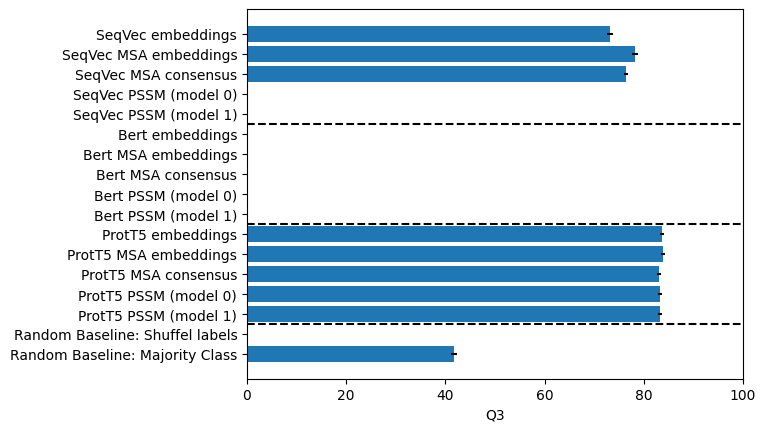

In [44]:
plt.rcdefaults()
fig, ax = plt.subplots()

ax.barh(y_pos, q3, xerr=se, align='center')
ax.set_yticks(y_pos, labels=labels)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Q3')
ax.set_xlim([0, 100])

plt.axhline(y=seperator_seqvec,  color='black', ls='--')
plt.axhline(y=seperator_bert,  color='black', ls='--')
plt.axhline(y=seperator_t5,  color='black', ls='--')

plt.show()

Plot difference to majority class prediction

c:\users\kyrae\pycharmprojects\rostlab\ev-embeddings-figures\venv\lib\site-packages\numpy\core\_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
c:\users\kyrae\pycharmprojects\rostlab\ev-embeddings-figures\venv\lib\site-packages\numpy\core\_methods.py:40: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial, where)


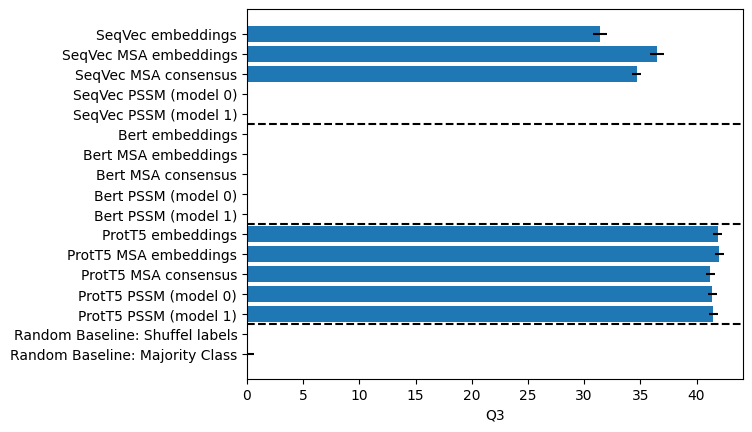

In [45]:
plt.rcdefaults()
fig, ax = plt.subplots()
y_pos = np.arange(len(labels))

bars = ax.barh(y_pos, difference_to_random, xerr=se, align='center')
ax.set_yticks(y_pos, labels=labels)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Q3')
ax.set_xlim(left=0)
# ax.bar_label(bars) IndexError

plt.axhline(y=seperator_seqvec,  color='black', ls='--')
plt.axhline(y=seperator_bert,  color='black', ls='--')
plt.axhline(y=seperator_t5,  color='black', ls='--')

plt.show()

## Plot vertically

In [46]:
x_pos = np.arange(len(labels))

seperator_seqvec = x_pos[4] + (x_pos[5] - x_pos[4])/2
seperator_bert = x_pos[9] + (x_pos[10] - x_pos[9])/2
seperator_t5 = x_pos[14] + (x_pos[15] - x_pos[14])/2

Plot Q3 only

c:\users\kyrae\pycharmprojects\rostlab\ev-embeddings-figures\venv\lib\site-packages\numpy\core\_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
c:\users\kyrae\pycharmprojects\rostlab\ev-embeddings-figures\venv\lib\site-packages\numpy\core\_methods.py:40: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial, where)
C:\Users\kyrae\AppData\Local\Temp\ipykernel_19292\1554389190.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels, rotation=45, ha='right')


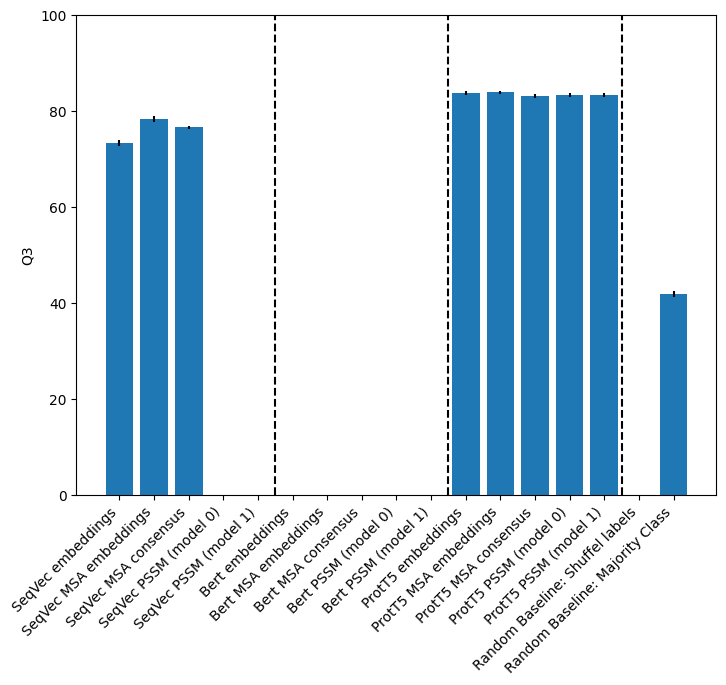

In [47]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

ax.bar(labels, q3, yerr=se)
ax.set_ylim([0, 100])
ax.set_xticklabels(labels, rotation=45, ha='right')
ax.set_ylabel('Q3')

plt.axvline(x=seperator_seqvec,  color='black', ls='--')
plt.axvline(x=seperator_bert,  color='black', ls='--')
plt.axvline(x=seperator_t5,  color='black', ls='--')

plt.show()

Plot difference to majority class prediction

c:\users\kyrae\pycharmprojects\rostlab\ev-embeddings-figures\venv\lib\site-packages\numpy\core\_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
c:\users\kyrae\pycharmprojects\rostlab\ev-embeddings-figures\venv\lib\site-packages\numpy\core\_methods.py:40: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial, where)
C:\Users\kyrae\AppData\Local\Temp\ipykernel_19292\456156945.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels, rotation=45, ha='right')


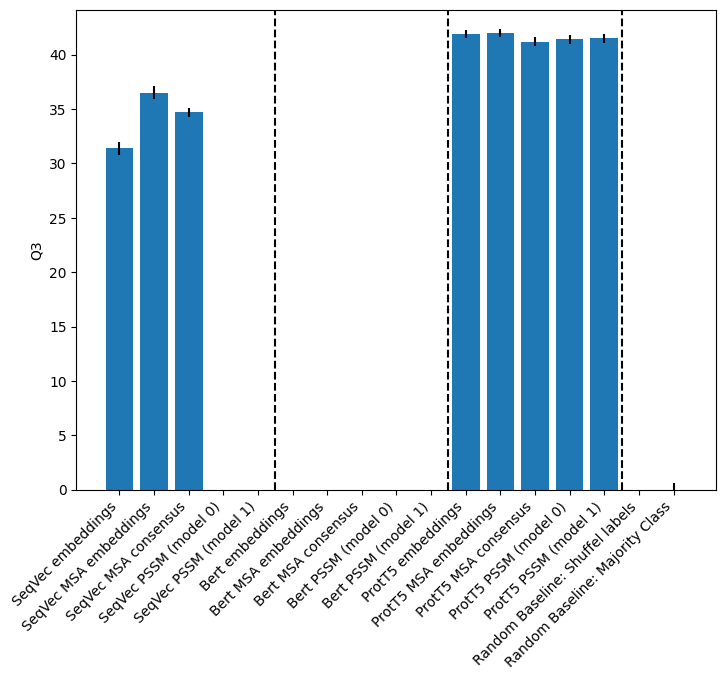

In [48]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
x_pos = np.arange(len(labels))


ax.bar(labels, difference_to_random, yerr=se)
ax.set_ylim(bottom=0)
ax.set_xticklabels(labels, rotation=45, ha='right')
ax.set_ylabel('Q3')

plt.axvline(x=seperator_seqvec,  color='black', ls='--')
plt.axvline(x=seperator_bert,  color='black', ls='--')
plt.axvline(x=seperator_t5,  color='black', ls='--')

plt.show()

# Plot Conservation from embeddings vs. Embeddings + Evolutionary Information (MSAs)

<span style="color:red">TODO!</span>

# Plot SOTA with Evolutionary Information vs. Embeddings

<span style="color:red">TODO: caluclate random for all tasks, more tasks</span>

C:\Users\kyrae\AppData\Local\Temp\ipykernel_19292\692592209.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(grouped_mcc_labels, rotation=45, ha='right')
C:\Users\kyrae\AppData\Local\Temp\ipykernel_19292\692592209.py:11: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  ax1.axvline(x=[2.5],  color='black', ls='--')
C:\Users\kyrae\AppData\Local\Temp\ipykernel_19292\692592209.py:12: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  ax1.axvline(x=[5.5],  color='black', ls='--')
C:\Users\kyrae\AppData\Local\Temp\ipykernel_19292\692592209.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(grouped_qx_lab

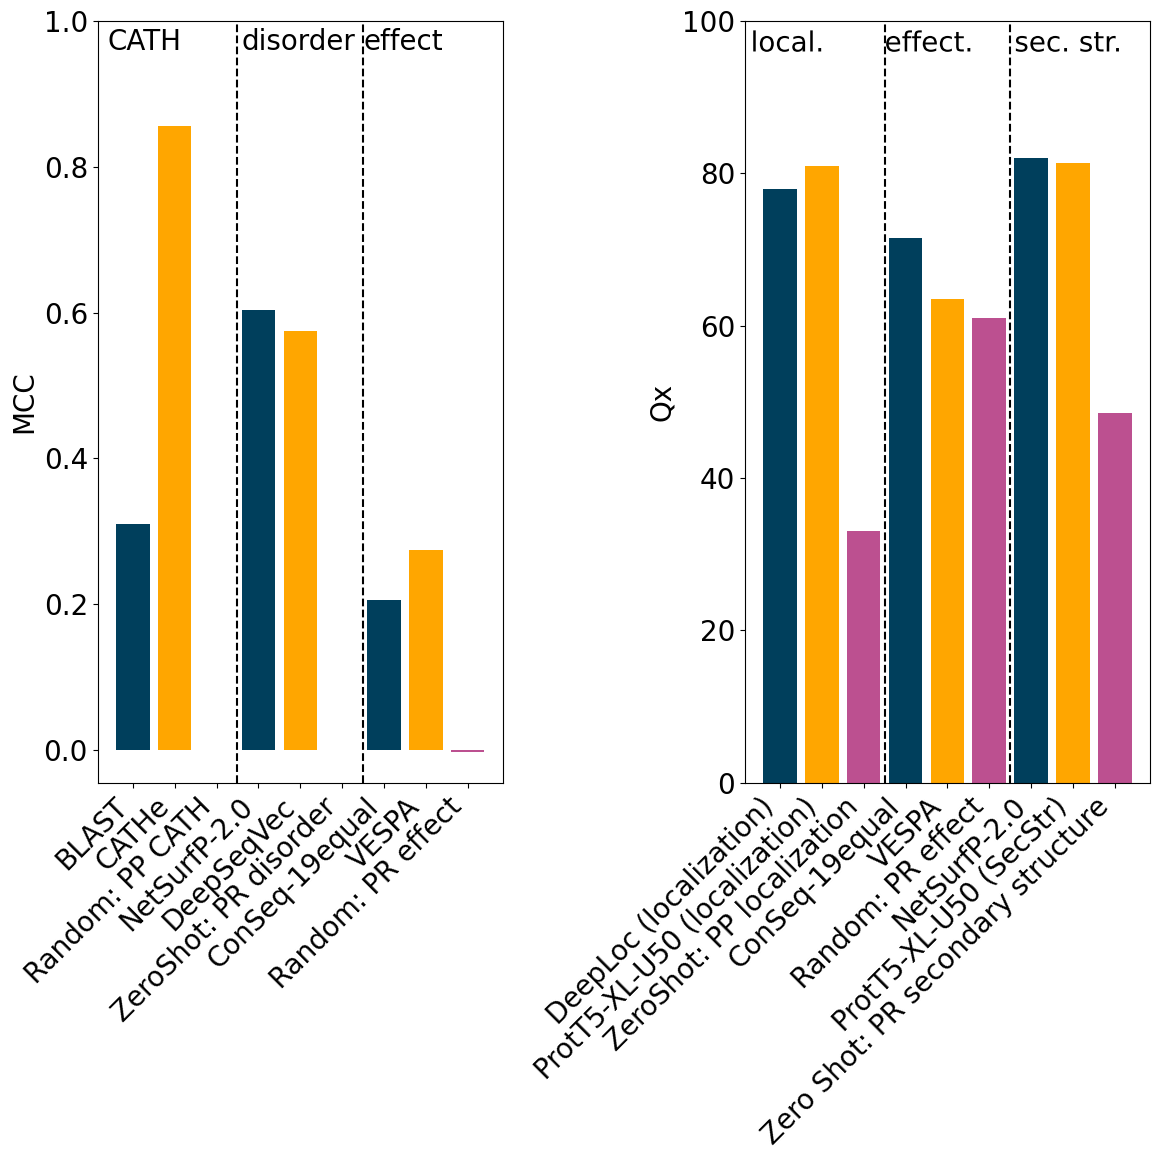

In [49]:
plt.rcParams['font.size'] = '20'

fig1, ((ax1, ax2)) = plt.subplots(1,2, figsize=(12,12))
ax1.bar(grouped_mcc_labels, [float(entry) for entry in mcc], color=['#003f5c' if entry==0 else ("#ffa600" if entry==1 else '#bc5090') for entry in mcc_is_embedding_based])
ax1.set_xticklabels(grouped_mcc_labels, rotation=45, ha='right')
ax1.set_ylabel("MCC")
ax1.set_ylim(top=1)
ax1.annotate('CATH',xy=(-0.6, 0.96))
ax1.annotate('disorder',xy=(2.6, 0.96))
ax1.annotate('effect', xy=(5.5, 0.96))
ax1.axvline(x=[2.5],  color='black', ls='--')
ax1.axvline(x=[5.5],  color='black', ls='--')

grouped_qx_labels_as_strings = [str(entry) for entry in grouped_qx_labels]
qx_bars_as_float = [float(entry) for entry in qx]
qx_colors = ['#003f5c' if entry==0 else ("#ffa600" if entry==1 else '#bc5090') for entry in qx_is_embedding_based]

ax2.bar(grouped_qx_labels_as_strings, qx_bars_as_float, color=qx_colors)
ax2.set_xticklabels(grouped_qx_labels, rotation=45, ha='right')
ax2.set_ylabel("Qx")
ax2.set_ylim(top=100)
ax2.annotate('local.',xy=(-0.7, 96), path_effects=[path_effects.withSimplePatchShadow(shadow_rgbFace='white')])
ax2.annotate('effect.',xy=(2.5, 96), path_effects=[path_effects.withSimplePatchShadow(shadow_rgbFace='white')])
ax2.annotate('sec. str.',xy=(5.6, 96), path_effects=[path_effects.withSimplePatchShadow(shadow_rgbFace='white')])
ax2.axvline(x=[2.5],  color='black', ls='--')
ax2.axvline(x=[5.5],  color='black', ls='--')

fig1.tight_layout()



C:\Users\kyrae\AppData\Local\Temp\ipykernel_19292\3781860865.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax3.set_xticklabels(grouped_f1_labels, rotation=45, ha='right')
C:\Users\kyrae\AppData\Local\Temp\ipykernel_19292\3781860865.py:8: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  ax3.axvline(x=[2.5],  color='black', ls='--')
C:\Users\kyrae\AppData\Local\Temp\ipykernel_19292\3781860865.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax4.set_xticklabels(grouped_precision_labels, rotation=45, ha='right')
C:\Users\kyrae\AppData\Local\Temp\ipykernel_19292\3781860865.py:18: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  ax4.axv

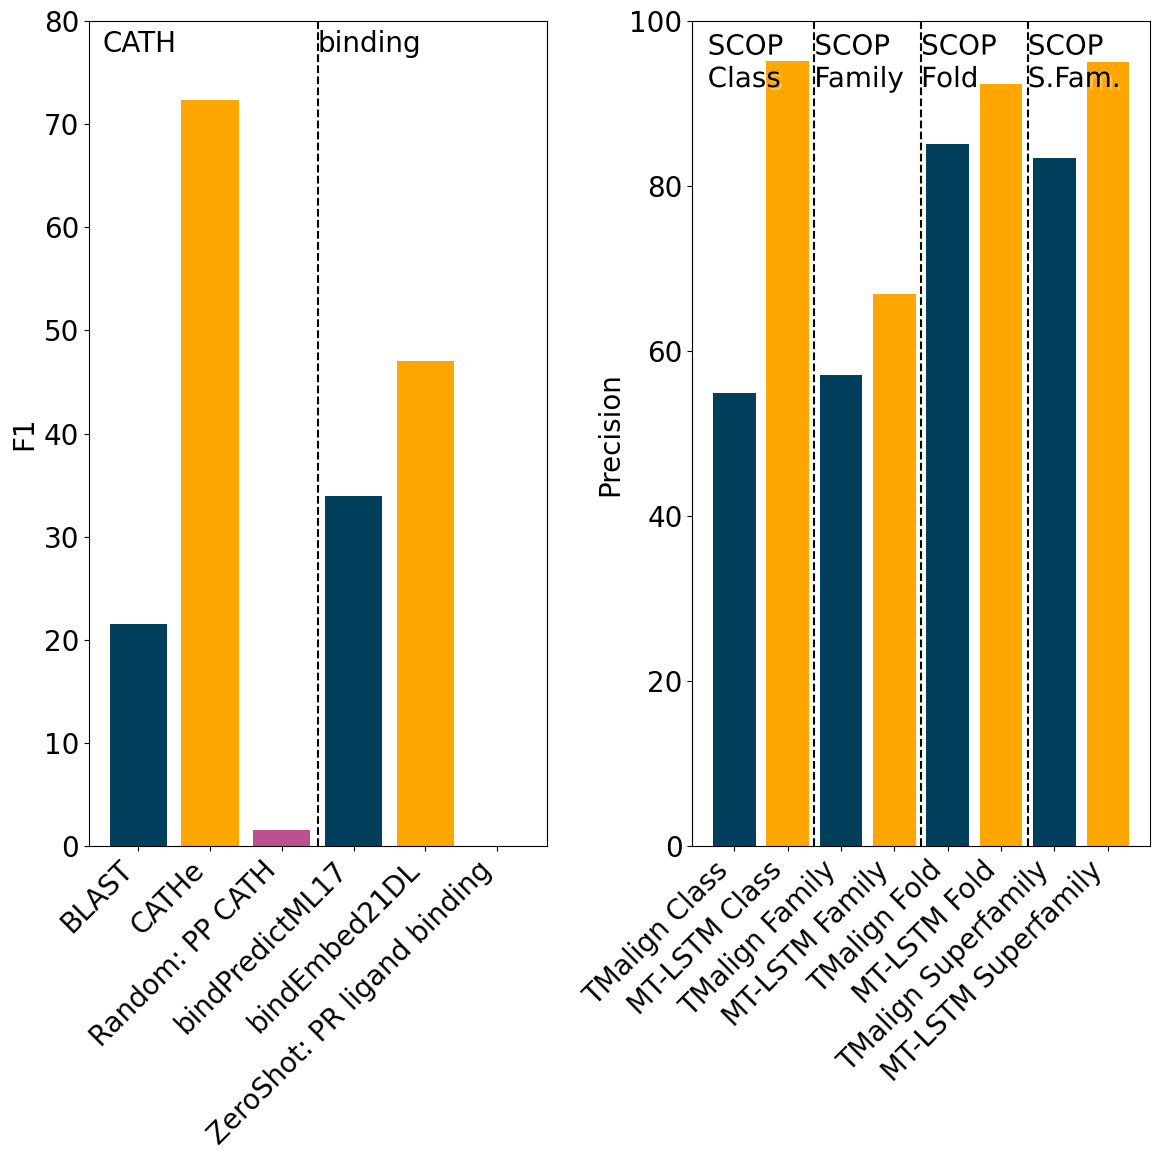

In [50]:
fig2, ((ax3, ax4)) = plt.subplots(1,2, figsize=(12,12))
ax3.bar(grouped_f1_labels, [float(entry) for entry in f1], color=['#003f5c' if entry==0 else ("#ffa600" if entry==1 else '#bc5090') for entry in f1_is_embedding_based])
ax3.set_xticklabels(grouped_f1_labels, rotation=45, ha='right')
ax3.set_ylabel("F1")
ax3.set_ylim(top=80)
ax3.annotate('CATH',xy=(-0.5, 77))
ax3.annotate('binding',xy=(2.5, 77))
ax3.axvline(x=[2.5],  color='black', ls='--')

ax4.bar(grouped_precision_labels, [float(entry) for entry in precision], color=['#003f5c' if entry==0 else ("#ffa600" if entry==1 else '#bc5090') for entry in precision_is_embedding_based])
ax4.set_xticklabels(grouped_precision_labels, rotation=45, ha='right')
ax4.set_ylabel("Precision")
ax4.set_ylim(top=100)
ax4.annotate('SCOP\nClass',xy=(-0.5, 92), path_effects=[path_effects.withSimplePatchShadow(shadow_rgbFace='white')])
ax4.annotate('SCOP\nFamily',xy=(1.5, 92), path_effects=[path_effects.withSimplePatchShadow(shadow_rgbFace='white')])
ax4.annotate('SCOP\nFold',xy=(3.5, 92), path_effects=[path_effects.withSimplePatchShadow(shadow_rgbFace='white')])
ax4.annotate('SCOP\nS.Fam.',xy=(5.5, 92), path_effects=[path_effects.withSimplePatchShadow(shadow_rgbFace='white')])
ax4.axvline(x=[1.5],  color='black', ls='--')
ax4.axvline(x=[3.5],  color='black', ls='--')
ax4.axvline(x=[5.5],  color='black', ls='--')

fig2.tight_layout()

C:\Users\kyrae\AppData\Local\Temp\ipykernel_19292\4156552486.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax5.set_xticklabels(grouped_spearman_labels, rotation=45, ha='right')
C:\Users\kyrae\AppData\Local\Temp\ipykernel_19292\4156552486.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax6.set_xticklabels(grouped_recall_labels, rotation=45, ha='right')
C:\Users\kyrae\AppData\Local\Temp\ipykernel_19292\4156552486.py:16: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  ax6.axvline(x=[2.5],  color='black', ls='--')
C:\Users\kyrae\AppData\Local\Temp\ipykernel_19292\4156552486.py:17: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  ax6

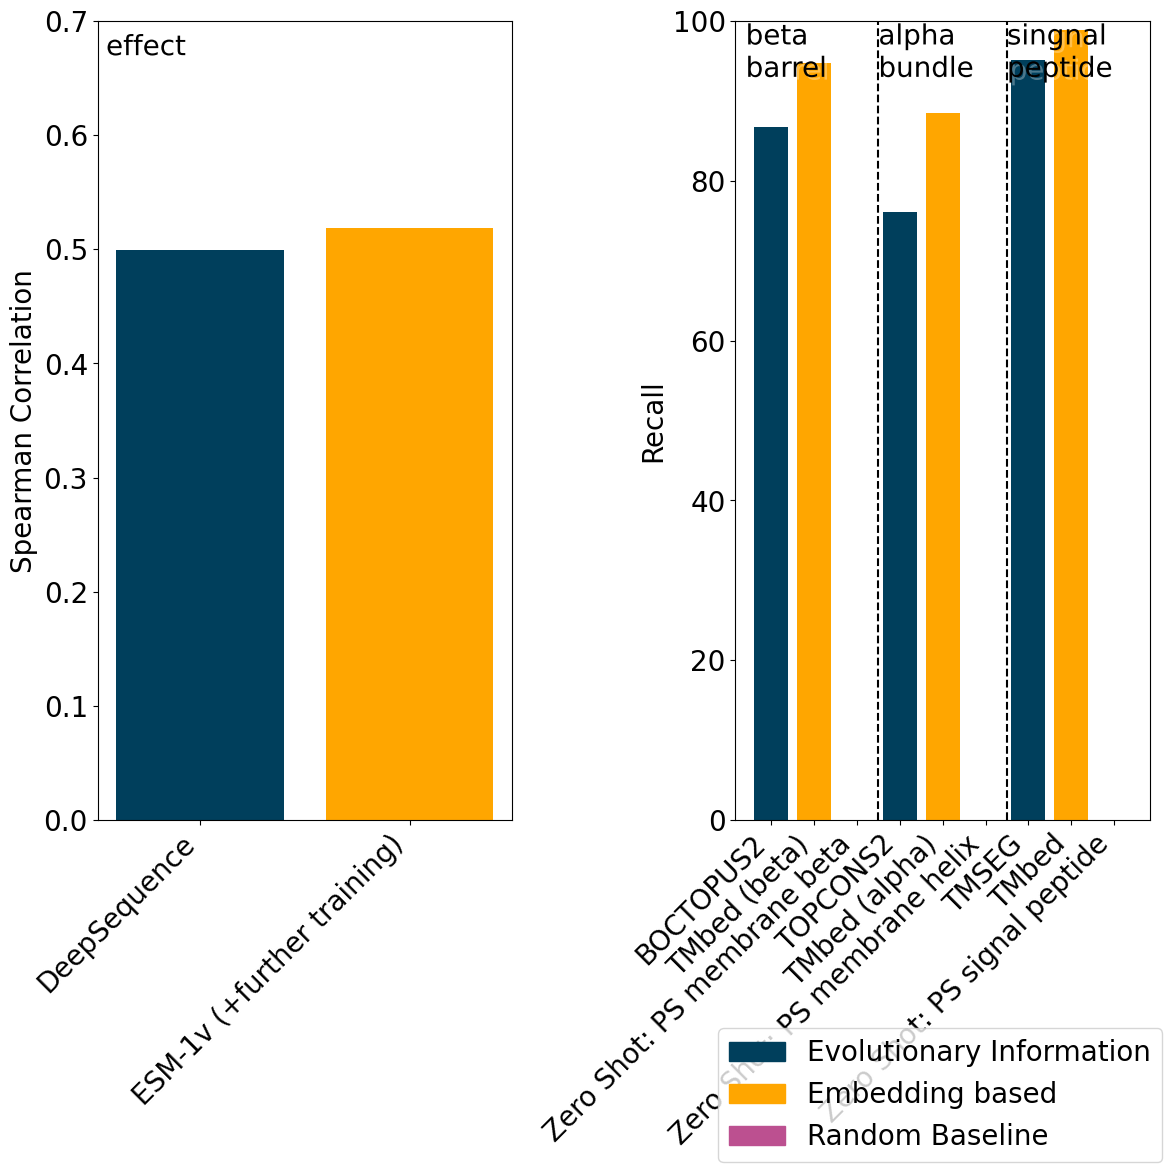

In [51]:
fig3, ((ax5, ax6)) = plt.subplots(1,2, figsize=(12,12))

ax5.bar(grouped_spearman_labels, [float(entry) for entry in spearman], color=['#003f5c' if entry==0 else ("#ffa600" if entry==1 else '#bc5090') for entry in spearman_is_embedding_based])
ax5.set_xticklabels(grouped_spearman_labels, rotation=45, ha='right')
ax5.set_ylabel("Spearman Correlation")
ax5.set_ylim(top=.7)
ax5.annotate('effect',xy=(-0.45, 0.67), path_effects=[path_effects.withSimplePatchShadow(shadow_rgbFace='white')])

ax6.bar(grouped_recall_labels, [float(entry) for entry in recall], color=['#003f5c' if entry==0 else ("#ffa600" if entry==1 else '#bc5090') for entry in recall_is_embedding_based])
ax6.set_xticklabels(grouped_recall_labels, rotation=45, ha='right')
ax6.set_ylabel("Recall")
ax6.set_ylim(top=100)
ax6.annotate('beta \nbarrel',xy=(-0.6, 93), path_effects=[path_effects.withSimplePatchShadow(shadow_rgbFace='white')])
ax6.annotate('alpha \nbundle',xy=(2.5, 93), path_effects=[path_effects.withSimplePatchShadow(shadow_rgbFace='white')])
ax6.annotate('singnal \npeptide',xy=(5.5, 93), path_effects=[path_effects.withSimplePatchShadow(shadow_rgbFace='white')])
ax6.axvline(x=[2.5],  color='black', ls='--')
ax6.axvline(x=[5.5],  color='black', ls='--')

legend_EI = mpatches.Patch(color='#003f5c', label='Evolutionary Information')
legend_EB = mpatches.Patch(color='#ffa600', label='Embedding based')
legend_Random = mpatches.Patch(color='#bc5090', label='Random Baseline')

fig3.legend(handles=[legend_EI, legend_EB, legend_Random], loc='lower right')
fig3.tight_layout()



## Information Content
Alternative to different performance measures: Compute and display information Content

In [52]:
def compute_information_content(confusion_matrix):
    cm_size = len(confusion_matrix)
    nr_samples = sum(sum(row) for row in confusion_matrix)
    a_i = [sum(row) for row in confusion_matrix]
    b_i = [0 for k in range(0, cm_size)]
    for i in range(0,cm_size):
        b_i = [x + y for x,y in zip(b_i ,[confusion_matrix[i][j] for j in range(0, cm_size)])]
    numerator = sum([a*np.log(a)for a in a_i]) - sum([confusion_matrix[i][i]*np.log(confusion_matrix[i][i])for i in range(0, cm_size)]) 
    denominator = nr_samples*np.log(nr_samples) - sum([b*np.log(b) for b in b_i]) 
    information_content = 1-numerator/denominator
    return information_content